### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量

In [25]:
import pandas as pd

raw_data = pd.read_csv('data/github_bot_raw_data.csv')
data = raw_data.copy()  # 备份数据以便后续操作

initial_count = data.shape[0]
data = data.drop_duplicates()
final_count = data.shape[0]

print(f"去重前的数据量: {initial_count}")
print(f"去重后的数据量: {final_count}")


去重前的数据量: 20358
去重后的数据量: 19779


### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值

In [26]:
#2.1
# 去掉 'gravatar_id' 列
data = data.drop(columns=['gravatar_id'])

# 查看每列缺失值情况
missing_values = data.isnull().sum()
print("缺失值情况：")
print(missing_values)


缺失值情况：
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2589
company                 8982
blog                   11263
location                7080
email                  11739
hireable               16481
bio                    10930
twitter_username       14859
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64


In [27]:
#2.2
# 转化可以表示为布尔变量的列（如 'company'、'location' 等）
bool_columns = ['company', 'location', 'email', 'hireable', 'site_admin']
for col in bool_columns:
    data[col] = data[col].notnull()  # 有值为 True，无值为 False

# 填充文本列的空值为空字符串
text_columns = ['name', 'bio', 'twitter_username', 'blog']
for col in text_columns:
    data[col] = data[col].fillna('')

#2.3
# 再次检查缺失值情况
missing_values_after = data.isnull().sum()
print("处理后缺失值情况：")
print(missing_values_after)


处理后缺失值情况：
actor_id               0
label                  0
login                  0
id                     0
node_id                0
avatar_url             0
url                    0
html_url               0
followers_url          0
following_url          0
gists_url              0
starred_url            0
subscriptions_url      0
organizations_url      0
repos_url              0
events_url             0
received_events_url    0
type                   0
site_admin             0
name                   0
company                0
blog                   0
location               0
email                  0
hireable               0
bio                    0
twitter_username       0
public_repos           0
public_gists           0
followers              0
following              0
created_at             0
updated_at             0
dtype: int64


### 3. 数据变换，将created_at、updated_at转为时间戳

In [ ]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['updated_at'] = pd.to_datetime(data['updated_at'])


### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

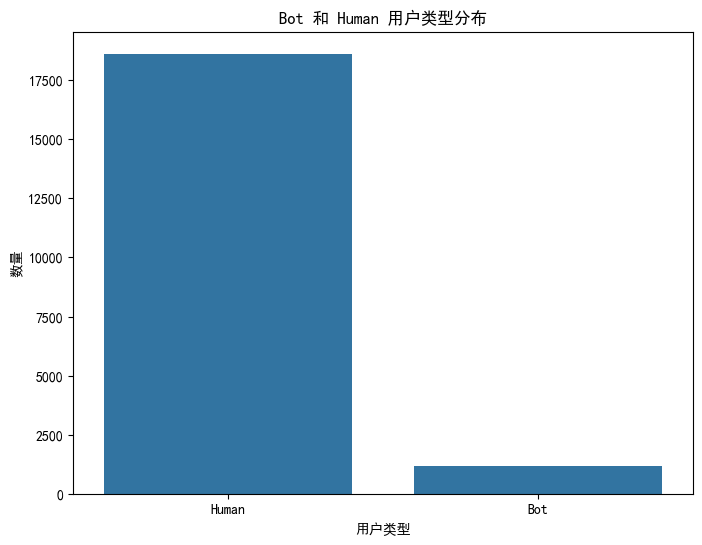

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='label')
plt.title("Bot 和 Human 用户类型分布")
plt.xlabel("用户类型")
plt.ylabel("数量")
plt.show()

###### 图标选择：柱状图适合展示类别数据，能够清晰地对比不同类别的数量差异，故使用柱状图来展示Bot和Human用户的数量分布

###### 结果分析：Human 用户数量显著多于 Bot 用户。这表明 GitHub 上的绝大多数用户是人类用户，而机器人用户数量较少。

###### 数据洞察：大部分 GitHub 活动由人类用户驱动，机器人大多用于自动化任务。

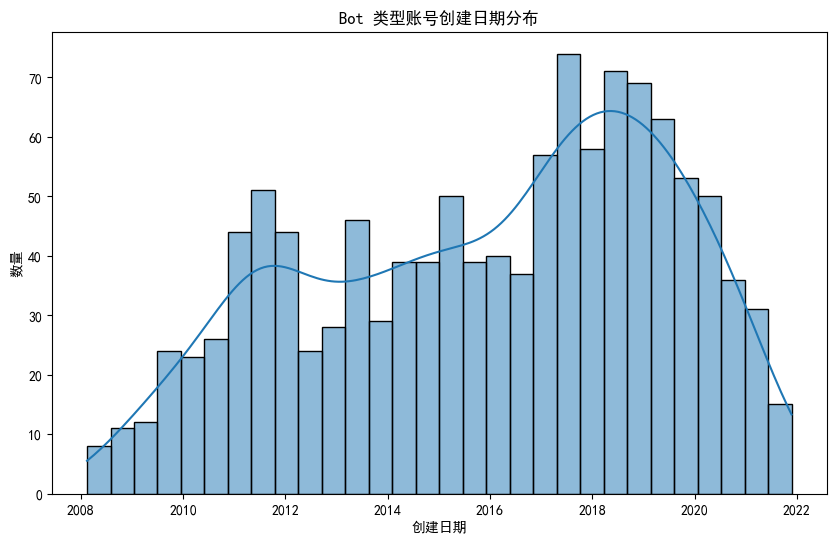

In [ ]:
bot_data = data[data['label'] == 'Bot']

plt.figure(figsize=(10, 6))
sns.histplot(bot_data['created_at'], bins=30, kde=True)
plt.title("Bot 类型账号创建日期分布")
plt.xlabel("创建日期")
plt.ylabel("数量")
plt.show()

###### 图标选择：直方图适合分析时间序列数据的集中趋势，可以直观地展示不同时间段内账号创建的密度分布，故使用直方图展示Bot洪湖的创建日期分布

###### 结果分析：Bot 账号的创建量账号创建数整体呈上升趋势，在近两年有所下滑。在2008年到2012年出现第一次大幅增长后，在2012年到2016年小幅平稳上涨，在2017年到2019年第二次显著增加，2020年到2022年有所下滑。

###### 数据洞察：Bot 账号的增长与 GitHub 平台对自动化支持的提升是同步的。近年来，自动化工具（如 CI/CD、自动代码检查）需求的增长，推动了 Bot 账号的注册量。这也反映出 GitHub 正在成为不仅仅是人类开发者的协作平台，更是服务于自动化流程和任务处理的基础设施。

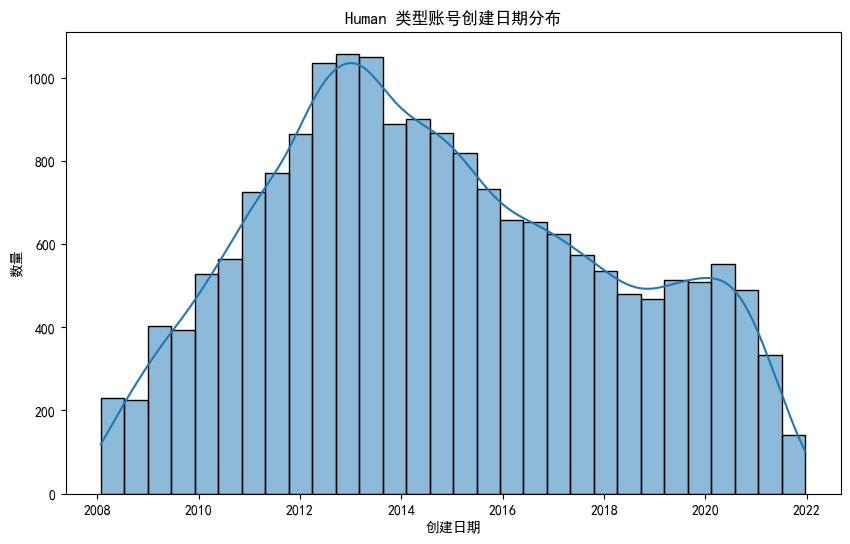

In [ ]:
human_data = data[data['label'] == 'Human']

plt.figure(figsize=(10, 6))
sns.histplot(human_data['created_at'], bins=30, kde=True)
plt.title("Human 类型账号创建日期分布")
plt.xlabel("创建日期")
plt.ylabel("数量")
plt.show()

###### 图表选择：为寻找某些时期内 GitHub 用户注册的增长情况，可以选择直方图对时间序列数据的集中趋势进行展示。

###### 结果分析：GitHub 用户账号创建量从2018年起稳步增长，在2013年左右出现了用户注册高峰，而后逐渐下滑，到2018年到2020年账号创建量小幅反弹，而后大幅下降。
###### 这些增长高峰可能与 GitHub 功能更新、技术社区扩展等相关，显示出 GitHub 在特定阶段吸引了大量用户。

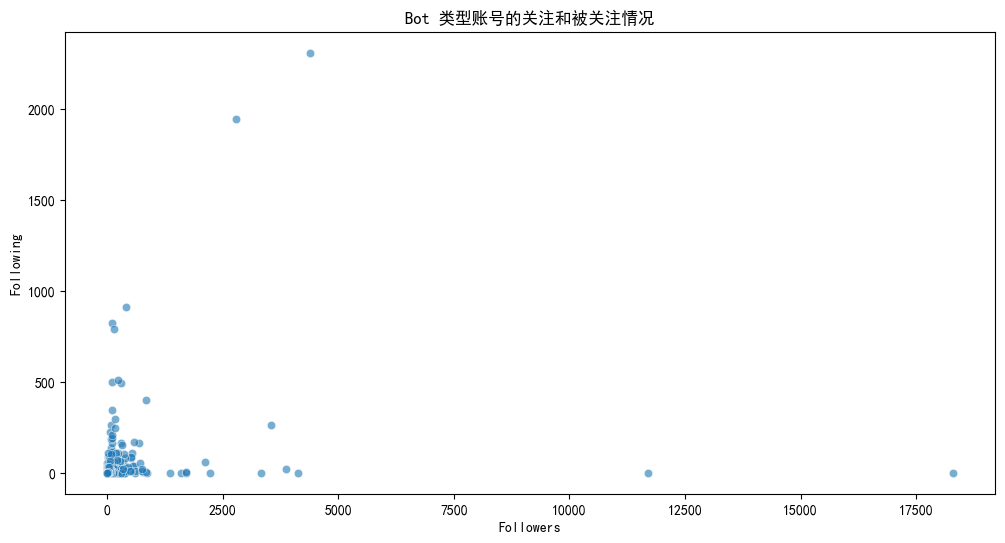

In [33]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bot_data, x='followers', y='following', alpha=0.6)
plt.title("Bot 类型账号的关注和被关注情况")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()

###### 图标选择：选择散点图用于展示 followers（粉丝数）与 following（关注数）的关系，以便观察 Bot 用户的社交情况。

###### 结果分析：大多数 Bot 用户的 followers 和 following 值都较低，集中在小范围内。少数Bot账号的 followers 或 following 数较高。

###### 数据洞察：机器人账号的关注互动较少，这表明其主要功能是执行自动化任务，而非建立社交关系。部分关注较多的 Bot 可能用于内容推送或项目管理。

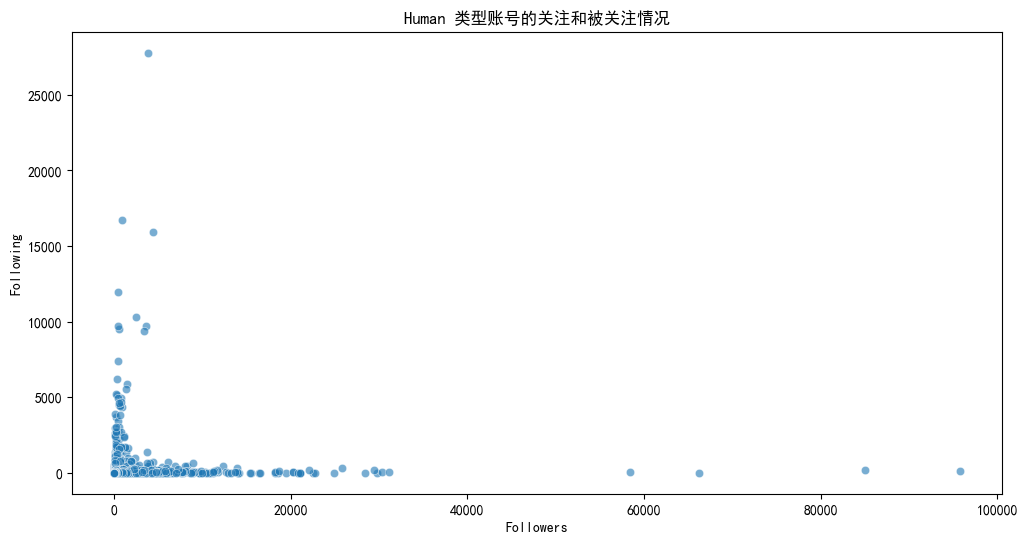

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=human_data, x='followers', y='following', alpha=0.6)
plt.title("Human 类型账号的关注和被关注情况")
plt.xlabel("Followers")
plt.ylabel("Following")
plt.show()

###### 图表选择：使用散点图，对比 Human 用户在关注和被关注情况上的差异，便于分析不同用户类型的社交活跃度。

###### 结果分析：大多数 Human 用户的关注和被关注数量较低，部分活跃用户的关注数和粉丝数较高。

###### 数据洞察：一些人类用户在 GitHub 社区中表现出较高的社交活跃度，可能是因为他们在某些领域有影响力。相比于机器人用户，人类用户更倾向于双向互动和建立社交网络。这可以用于进一步探索 GitHub 社区的社交结构。

In [ ]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]